Anggota : -Fahmi Septiano Shesta (1303210170)
          -Ricchie Eqinov Tandumay (1303210155)
          -Moehamad Fitrah (1303213118)

# **1. Preprocessing Data**

Import library yang akan digunakan, menggunakan pandas, numpy, scipy, math dan seaborn
lalu menggunakan sklearn, matplotlib dan juga warnings

Menginstall lib scikit-plot untuk evaluasi dataset.

In [8]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
#library dasar, pd,np,mat,sbrn untuk preprocessing, melihat outlier dan melihat kualitas data awal
import pandas as pd
import numpy as np
import math as mat
import seaborn as sbrn
import matplotlib.pyplot as mpl
%matplotlib inline 
#Tujuan dilakukannya %matplotlib inline adalah agar semua visualisasi yang nantinya ditampilkan, dapat langsung ditampilkan di colab/github ini.
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings

#bahan strategi
from sklearn.metrics import r2_score,mean_squared_error,accuracy_score,recall_score,precision_score,confusion_matrix,classification_report
from scikitplot.metrics import plot_confusion_matrix,plot_roc

#untuk modeling, DT dan kNN menggunakan sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

Membaca datasetsnya, dengan var penampung yaitu df (dataframe)

In [10]:
df=pd.read_csv("datasets.csv",header=None)

Mengecek dataframe, head dan tail

In [11]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7


In [12]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
447,53,1,160,70,80,199,382,154,117,-37,...,0.0,4.3,-5.0,0.0,0.0,0.7,0.6,-4.4,-0.5,1
448,37,0,190,85,100,137,361,201,73,86,...,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4,10
449,36,0,166,68,108,176,365,194,116,-85,...,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2,2
450,32,1,155,55,93,106,386,218,63,54,...,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6,1
451,78,1,160,70,79,127,364,138,78,28,...,0.0,10.4,-1.8,0.0,0.0,0.5,1.6,21.3,32.8,1


In [13]:
df.shape

(452, 280)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Columns: 280 entries, 0 to 279
dtypes: float64(120), int64(155), object(5)
memory usage: 988.9+ KB


In [15]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,...,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000
mean,46.471239,0.550885,166.188053,68.170354,88.920354,155.152655,367.207965,169.949115,90.004425,33.676991,...,-0.278982,9.048009,-1.457301,0.003982,0.0,0.514823,1.222345,19.326106,29.473230,3.880531
std,16.466631,0.497955,37.170340,16.590803,15.364394,44.842283,33.385421,35.633072,25.826643,45.431434,...,0.548876,3.472862,2.002430,0.050118,0.0,0.347531,1.426052,13.503922,18.493927,4.407097
min,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,108.000000,0.000000,-172.000000,...,-4.100000,0.000000,-28.600000,0.000000,0.0,-0.800000,-6.000000,-44.200000,-38.600000,1.000000
25%,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,350.000000,148.000000,79.000000,3.750000,...,-0.425000,6.600000,-2.100000,0.000000,0.0,0.400000,0.500000,11.450000,17.550000,1.000000
50%,47.000000,1.000000,164.000000,68.000000,86.000000,157.000000,367.000000,162.000000,91.000000,40.000000,...,0.000000,8.800000,-1.100000,0.000000,0.0,0.500000,1.350000,18.100000,27.900000,1.000000
75%,58.000000,1.000000,170.000000,79.000000,94.000000,175.000000,384.000000,179.000000,102.000000,66.000000,...,0.000000,11.200000,0.000000,0.000000,0.0,0.700000,2.100000,25.825000,41.125000,6.000000
max,83.000000,1.000000,780.000000,176.000000,188.000000,524.000000,509.000000,381.000000,205.000000,169.000000,...,0.000000,23.600000,0.000000,0.800000,0.0,2.400000,6.000000,88.800000,115.900000,16.000000


Disini kita melakukan df.info() untuk memeriksa metadata yang tersedia, dan df.describe() untuk melihat kualitas data dengan melihat count, mean, std.dev, min data, 1/4,2/4,dan 3/4 lalu max data. 

Check untuk NULL values

In [16]:
pd.isnull(df).sum().sum()

0

Melakukan replace terhadap value yang bernilai '?' dengan NaN (NULL), agar lebih mudah diproses

In [17]:
df = df.replace('?', np.NaN)

Menghitung yang bernilai null pada dataset (yang sebelumnya '?' diproses)

In [18]:
nullval=pd.isnull(df).sum().sum()
nullval

408

Visualisasi distribusi data, mengecek dimana data yang kira-kira banyak memiliki value NULL


Text(0, 0.5, 'Total nilai yang memiliki NULL dari kolom tersebut')

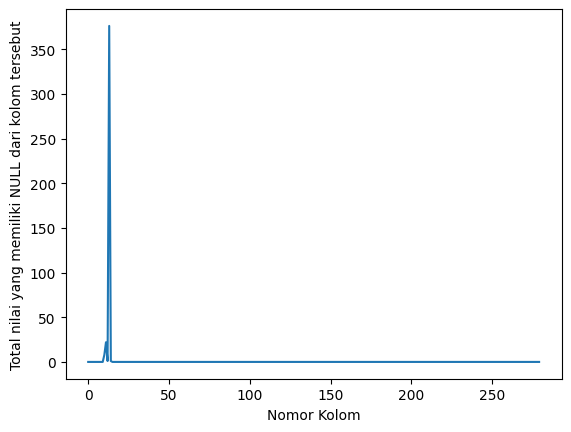

In [19]:
pd.isnull(df).sum().plot()
mpl.xlabel('Nomor Kolom')
mpl.ylabel('Total nilai yang memiliki NULL dari kolom tersebut')

Zoom in terhadap visualisasi

Text(0, 0.5, 'Total nilai yang memiliki NULL dari kolom tersebut')

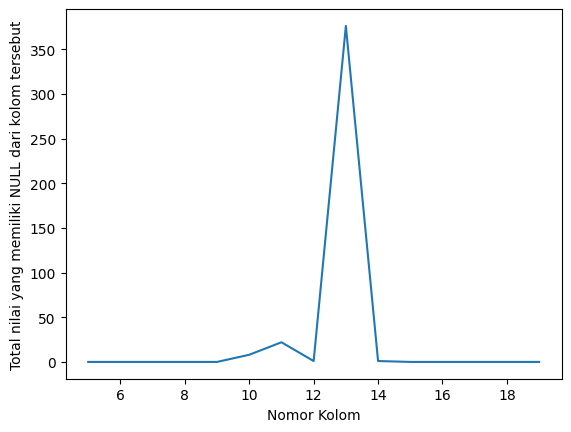

In [20]:
pd.isnull(df).sum()[5:20].plot(kind="line")
mpl.xlabel('Nomor Kolom')
mpl.ylabel('Total nilai yang memiliki NULL dari kolom tersebut')

Dapat dilihat bahwa column bernomor 13 memiliki null values lebih dari 350(diatas 70% dari data), maka kita akan melakukan drop terhadap column 13, artinya column 13 bisa dibuang saja (drop)

In [21]:
df.drop(columns = 13, inplace=True)

Untuk column yang lain yang memiliki NULL values, akan dilakukan replacement terhadap value mean dari kolom tersebut

In [22]:
# Membuat copy untuk menghindari mengganti data yang sebenarnya

new_df = df.copy()

In [23]:
# Membuat column baru yang akan di impute

col_kosong = (col for col in new_df.columns if new_df[col].isnull().any())
for col in col_kosong:
    new_df[col] = new_df[col].isnull()

In [24]:
# Proses Imputasi

imputasi = SimpleImputer()
new_df = pd.DataFrame(imputasi.fit_transform(new_df))
new_df.columns = df.columns

Melakukan imputasi dengan modul sklearn.impute, lalu nilai-nilai yang tidak lengkap akan diisi dengan nilai yang diprediksi yang tersedia di dataset.

In [25]:
new_df.head()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75.0,0.0,190.0,80.0,91.0,193.0,371.0,174.0,121.0,-16.0,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8.0
1,56.0,1.0,165.0,64.0,81.0,174.0,401.0,149.0,39.0,25.0,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6.0
2,54.0,0.0,172.0,95.0,138.0,163.0,386.0,185.0,102.0,96.0,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10.0
3,55.0,0.0,175.0,94.0,100.0,202.0,380.0,179.0,143.0,28.0,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1.0
4,75.0,0.0,190.0,80.0,88.0,181.0,360.0,177.0,103.0,-16.0,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7.0


Mengecek sekali lagi untuk data yang bernilai NULL

In [26]:
pd.isnull(new_df).sum().sum()

0

Melakukan generate terhadap dataset finalnya (mengisi kolom atas dengan keterangannya)

In [27]:
final_df_columns=["Age","Sex","Height","Weight","QRS_Duration",
"P-R_Interval","Q-T_Interval","T_Interval","P_Interval","QRS","T","P","QRST","J","Heart_Rate",
"Q_Wave","R_Wave","S_Wave","R'_Wave","S'_Wave","Intrinsic_Deflections","Ragged_R_Nominal",
"Diphasic_R_Nominal","Ragged_P_Nominal","Diphasic_P_Nominal","Ragged_T_Nominal","Diphasic_T_Nominal", 
"DII_00", "DII_01", "DII_02", "DII_03", "DII_04", "DII_05", "DII_06", "DII_07", "DII_08", "DII_09", "DII_10", "DII_11",
"DIII_00", "DIII_01", "DIII_02", "DIII_03", "DIII_04", "DIII_05", "DIII_06", "DIII_07", "DIII_08", "DIII_09", "DIII_10", "DIII_11",
"AVR_00", "AVR_01", "AVR_02", "AVR_03", "AVR_04", "AVR_05", "AVR_06", "AVR_07", "AVR_08", "AVR_09", "AVR_10", "AVR_11",
"AVL_00", "AVL_01", "AVL_02", "AVL_03", "AVL_04", "AVL_05", "AVL_06", "AVL_07", "AVL_08", "AVL_09", "AVL_10", "AVL_11",
"AVF_00", "AVF_01", "AVF_02", "AVF_03", "AVF_04", "AVF_05", "AVF_06", "AVF_07", "AVF_08", "AVF_09", "AVF_10", "AVF_11",
"V1_00", "V1_01", "V1_02", "V1_03", "V1_04", "V1_05", "V1_06", "V1_07", "V1_08", "V1_09", "V1_10", "V1_11",
"V2_00", "V2_01", "V2_02", "V2_03", "V2_04", "V2_05", "V2_06", "V2_07", "V2_08", "V2_09", "V2_10", "V2_11",
"V3_00", "V3_01", "V3_02", "V3_03", "V3_04", "V3_05", "V3_06", "V3_07", "V3_08", "V3_09", "V3_10", "V3_11",
"V4_00", "V4_01", "V4_02", "V4_03", "V4_04", "V4_05", "V4_06", "V4_07", "V4_08", "V4_09", "V4_10", "V4_11",
"V5_00", "V5_01", "V5_02", "V5_03", "V5_04", "V5_05", "V5_06", "V5_07", "V5_08", "V5_09", "V5_10", "V5_11",
"V6_00", "V6_01", "V6_02", "V6_03", "V6_04", "V6_05", "V6_06", "V6_07", "V6_08", "V6_09", "V6_10", "V6_11"
"JJ_Wave","Amp_Q_Wave","Amp_R_Wave","Amp_S_Wave","R_Prime_Wave","S_Prime_Wave","P_Wave","T_Wave",
"QRSA","QRSTA","DII_170", "DII_171", "DII_172", "DII_173", "DII_174", "DII_175", "DII_176", "DII_177", "DII_178", "DII_179",
"DIII_180", "DIII_181", "DIII_182", "DIII_183", "DIII_184", "DIII_185", "DIII_186", "DIII_187", "DIII_188", "DIII_189",
"AVR_190", "AVR_191", "AVR_192", "AVR_193", "AVR_194", "AVR_195", "AVR_196", "AVR_197", "AVR_198", "AVR_199",
"AVL_200", "AVL_201", "AVL_202", "AVL_203", "AVL_204", "AVL_205", "AVL_206", "AVL_207", "AVL_208", "AVL_209",
"AVF_210", "AVF_211", "AVF_212", "AVF_213", "AVF_214", "AVF_215", "AVF_216", "AVF_217", "AVF_218", "AVF_219",
"V1_220", "V1_221", "V1_222", "V1_223", "V1_224", "V1_225", "V1_226", "V1_227", "V1_228", "V1_229",
"V2_230", "V2_231", "V2_232", "V2_233", "V2_234", "V2_235", "V2_236", "V2_237", "V2_238", "V2_239",
"V3_240", "V3_241", "V3_242", "V3_243", "V3_244", "V3_245", "V3_246", "V3_247", "V3_248", "V3_249",
"V4_250", "V4_251", "V4_252", "V4_253", "V4_254", "V4_255", "V4_256", "V4_257", "V4_258", "V4_259",
"V5_260", "V5_261", "V5_262", "V5_263", "V5_264", "V5_265", "V5_266", "V5_267", "V5_268", "V5_269",
"V6_270", "V6_271", "V6_272", "V6_273", "V6_274", "V6_275", "V6_276", "V6_277", "V6_278", "V6_279","class"]

Membuat datasets .csv yang baru

In [28]:
new_df.columns=final_df_columns
new_df.to_csv("new_datasets.csv")

Setelah dataframe yang baru sudah jadi, maka target attribut akan di remove dan akan menyimpan dataframe yang baru.
Tujuan atribut class disimpan di target adalah agar kita dapat mengklasifikasikan setiap jenis arrhythmia kedalam tiap tiap namanya

In [29]:
new_df.head(10)

,Age,Sex,Height,Weight,QRS_Duration,P-R_Interval,Q-T_Interval,T_Interval,P_Interval,QRS,...,V6_271,V6_272,V6_273,V6_274,V6_275,V6_276,V6_277,V6_278,V6_279,class
0,75.0,0.0,190.0,80.0,91.0,193.0,371.0,174.0,121.0,-16.0,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8.0
1,56.0,1.0,165.0,64.0,81.0,174.0,401.0,149.0,39.0,25.0,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6.0
2,54.0,0.0,172.0,95.0,138.0,163.0,386.0,185.0,102.0,96.0,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10.0
3,55.0,0.0,175.0,94.0,100.0,202.0,380.0,179.0,143.0,28.0,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1.0
4,75.0,0.0,190.0,80.0,88.0,181.0,360.0,177.0,103.0,-16.0,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7.0
5,13.0,0.0,169.0,51.0,100.0,167.0,321.0,174.0,91.0,107.0,...,-0.6,12.2,-2.8,0.0,0.0,0.9,2.2,13.5,31.1,14.0
6,40.0,1.0,160.0,52.0,77.0,129.0,377.0,133.0,77.0,77.0,...,0.0,6.5,0.0,0.0,0.0,0.4,1.0,14.3,20.5,1.0
7,49.0,1.0,162.0,54.0,78.0,0.0,376.0,157.0,70.0,67.0,...,0.0,8.2,-1.9,0.0,0.0,0.1,0.5,15.8,19.8,1.0
8,44.0,0.0,168.0,56.0,84.0,118.0,354.0,160.0,63.0,61.0,...,0.0,7.0,-1.3,0.0,0.0,0.6,2.1,12.5,30.9,1.0
9,50.0,1.0,167.0,67.0,89.0,130.0,383.0,156.0,73.0,85.0,...,-0.6,10.8,-1.7,0.0,0.0,0.8,0.9,20.1,25.1,10.0


In [30]:
target=new_df["class"]

final_df = new_df.drop(columns ="class")

Cek shape dari final_df

In [31]:
final_df.shape

(452, 278)

Dapat dilihat dari shape df yang sebelumnya dan setelahnya, memiliki total 280 dan 278 column, karena column no 13 dan column "class" telah di drop, makanya sekarang berjumlah 278

# **2. Exploratory Data Analysis (EDA)**

Pertama, melakukan sorting data sesuai dengan kelas-kelas yang ada (diambil dari column "class" atau "target" diatas, dengan 1-16 refer kepada Paper : H. Altay Guvenir, Burak Acar, Gulsen Demiroz, Ayhan Cekin "A Supervised Machine Learning Algorithm for Arrhythmia Analysis." Proceedings of the Computers in Cardiology Conference, Lund, Sweden, 1997.

In [32]:
class_names = ["Normal", 
               "Ischemic changes (CAD)", 
               "Old Anterior Myocardial Infraction",
               "Old Inferior Myocardial Infraction",
               "Sinus tachycardy", 
               "Sinus bradycardy", 
               "Ventricular Premature Contraction (PVC)",
               "Supraventricular Premature Contraction",
               "Left Boundle branch block",
               "Right boundle branch block",
               "1.Degree AtrioVentricular block",
               "2.Degree AV block",
               "3.Degree AV block",
               "Left Ventricule hypertrophy",
               "Atrial Fibrillation or Flutter",
               "Others"]

Dilakukan sorting sesuai dengan kelas yang ada

In [33]:
t_class=new_df.sort_values(by=["class"])

Melihat banyak data pada setiap kelas, seperti ada berapa yang "Normal", ada berapa yang CAD, dan seterusnya

In [34]:
countclass = t_class["class"].value_counts(sort=False).tolist()
countclass

[245, 44, 15, 15, 13, 25, 3, 2, 9, 50, 4, 5, 22]

Sekarang, data yang ada telah dilakukan count diatas akan divisualisasikan menggunakan histogram

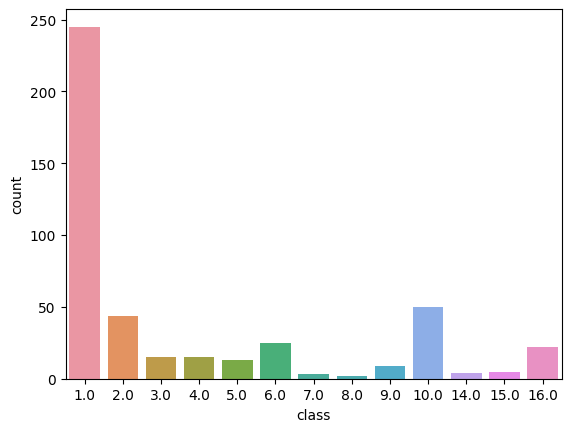

In [35]:
sbrn.countplot(x='class', data=new_df)
mpl.show()

Dapat dilihat ada beberapa column yang ternyata nilainya terloncati, setelah column 10 itu langsung column 14, maka artinya column nomer 11,12 dan 13 itu nilainya 0, dan tidak ditampilkan dalam histogram diatas, sehingga kita akan melakukan extend pada column yang bernilai 0 tersebut

In [36]:
class_extended = countclass[0:10]
class_extended.extend([0,0,0])
class_extended.extend(countclass[10:13])
print(class_extended)

[245, 44, 15, 15, 13, 25, 3, 2, 9, 50, 0, 0, 0, 4, 5, 22]


Nah, sekarang kita dapat melihat bahwa extended class tersebut lebih memiliki nilai 0 yang telah dimasukkan pada column nomer 11,12,13

Lalu, kita melakukan visualisasi lagi terhadap class ini dengan menggunakan pie chart agar seluruh column tipe-tipe arrhythmia itu terlihat

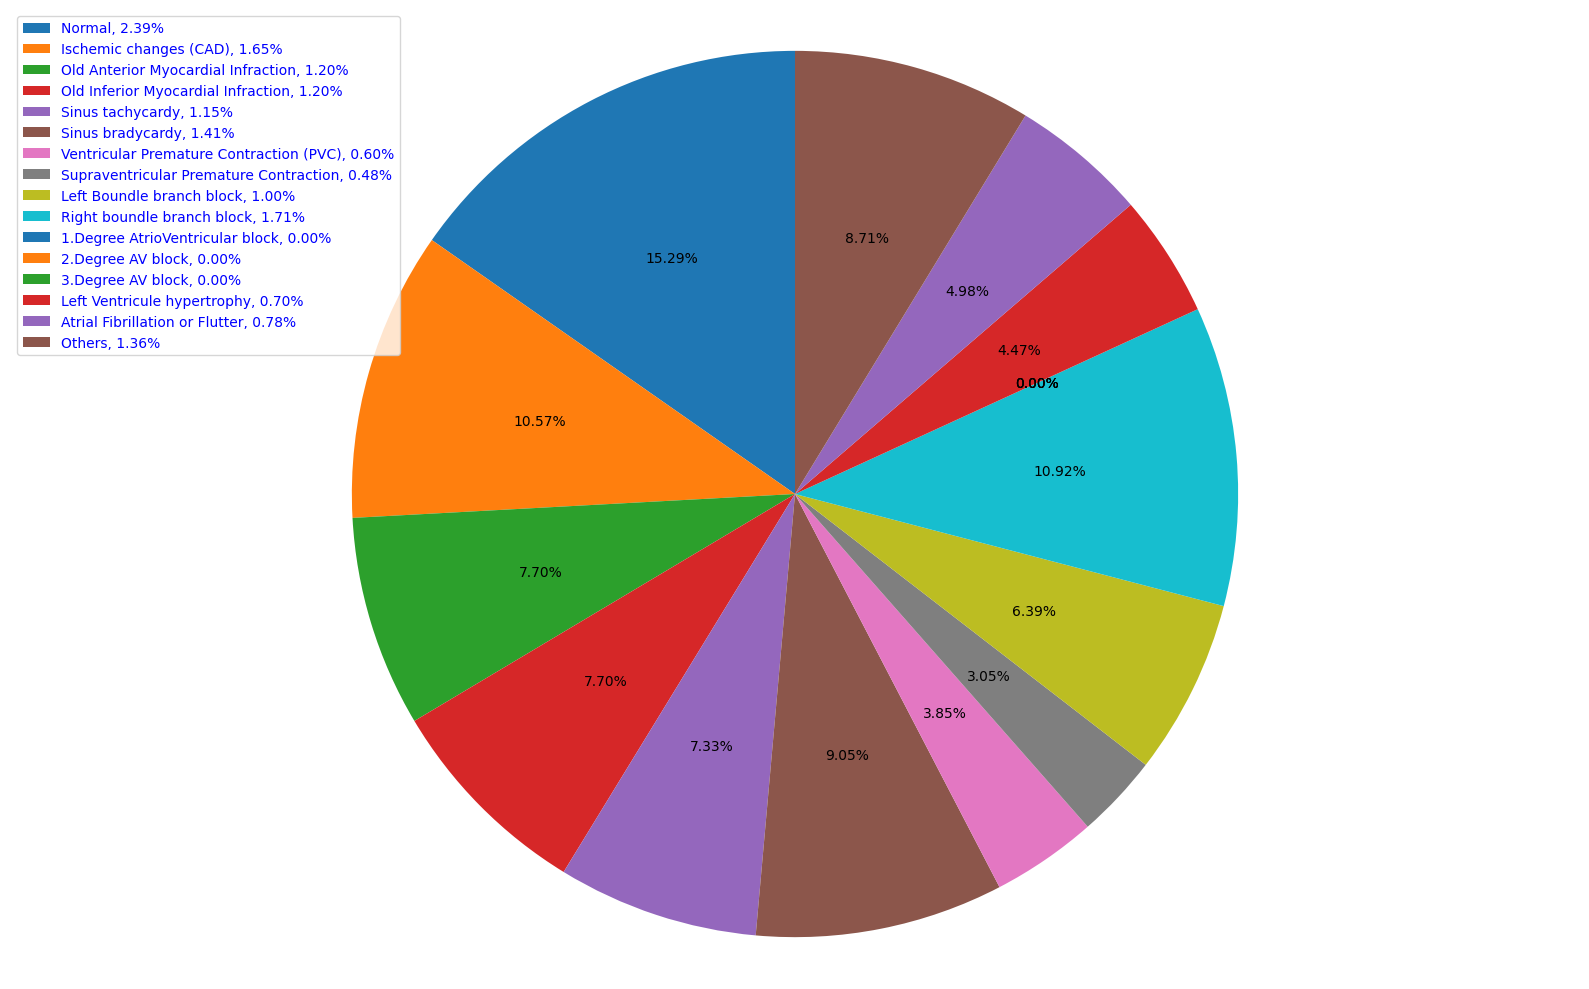

In [37]:
labels = class_names
Log_Norm = []
for i in class_extended:
  Log_Norm.append(mat.log10(i+1))
fig1, ax1 = mpl.subplots(figsize=(16,10))
patches = mpl.pie(Log_Norm, autopct='%1.2f%%', startangle = 90)

leg = mpl.legend(loc = 'best', labels=['%s, %1.2f%%'% (l, s) for l, s in zip(labels, Log_Norm)])
mpl.axis('equal')

for text in leg.get_texts():
  mpl.setp(text, color = 'Blue')
mpl.tight_layout()
mpl.show()

Berdasarkan pie chart yang merupakan visualisasi datanya, dapat dilihat bahwa 245 orang merupakan "Normal", dan berdasarkan hal tersebut, orang normal bukan sebuah klasifikasi penyakit arrhythmia, jadi kita tidak memerlukannya, dan kita memiliki 12 tipe yang ada pengidapnya, dikarenakan 3 tipe klasifikasi (1,2,dan 3 degree AV block) tidak memiliki pengidap, maka kita juga membuang untuk mendapatkan hasil/akurasi yang lebih relevan (sesuai dengan poin (1) di tugas dan tanggung jawab), jadi kita menggunakan 12 kelas tersebut (yang memiliki pengidap)

Sekarang, kita akan lanjut kepada outliers dari dataset, disini kita hanya akan lebih berfokus kepada outliers-outliers yang memiliki nilai tidak wajar saja, sehingga untuk outliers lainnya yang dianggap wajar tidak akan dikeluarkan/diketikkan.

Pertama, akan dicari outliers dengan menggunakan Scatter Plot dari column Age, Sex, Height dan Weight dari para pasien dengan pembedanya adalah 'Sex' atau jenis kelamin, dimana 0 adalah Male dan 1 adalah Female

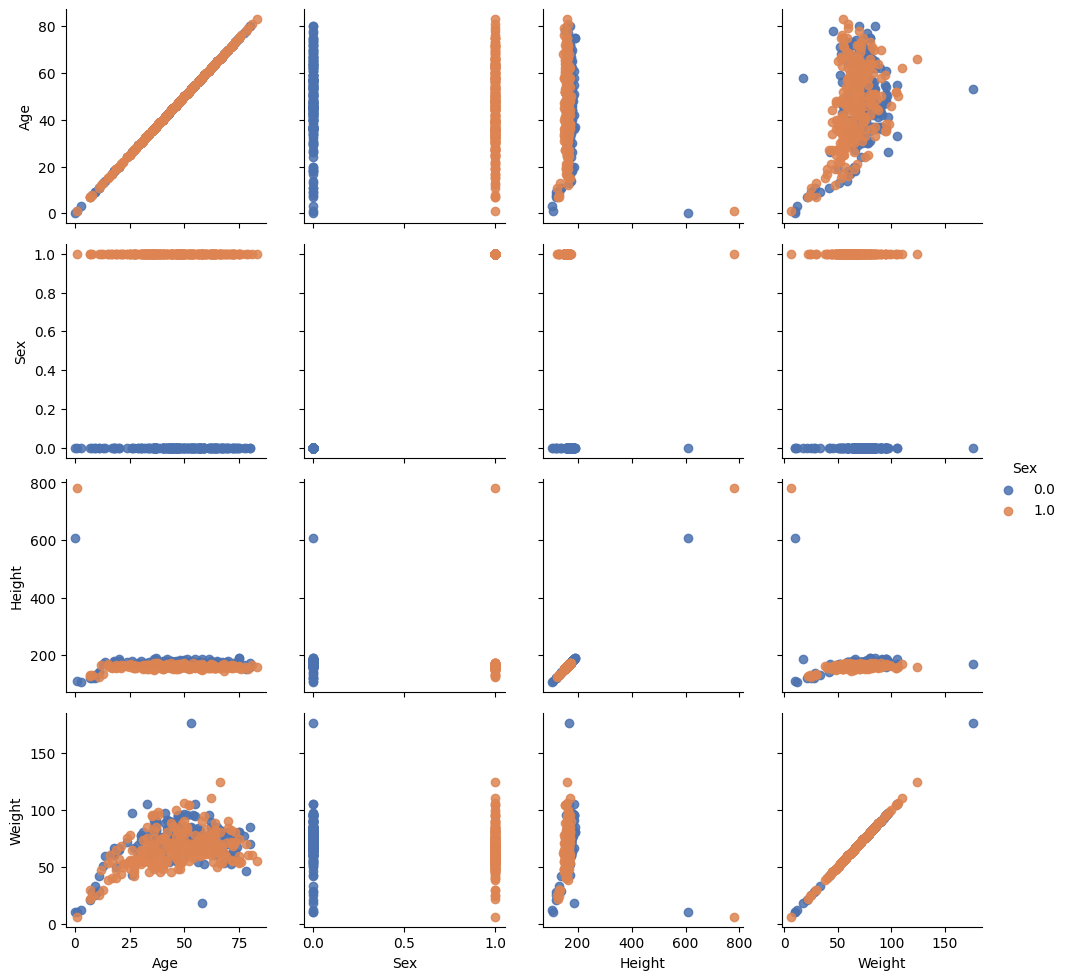

In [38]:
outlier1 = sbrn.PairGrid(final_df, vars=['Age','Sex','Height','Weight'], hue='Sex', palette='deep')
outlier1.map(mpl.scatter, alpha=0.85)
outlier1.add_legend();

Kita disini melihat kejanggalan pada Height dimana ada titik-titik yang berada pada tinggi yang tidak seharusnya dialami oleh manusia, kita dapat melihat datanya dengan fungsi sorted() dengan sort descending, parameter reverse di set True, dengan melihat 5 data teratas

In [39]:
sorted(final_df['Height'], reverse=True) [:5]

[780.0, 608.0, 190.0, 190.0, 190.0]

Ternyata, ada orang dengan tinggi 780 dan 608 yang dipercaya sebagai typo, karena tidak ada manusia dengan tinggi melebihi 3 meter, kami melakukan replacement terhadap nilai-nilai tersebut, yaitu 780 menjadi 180, dan 608 menjadi 108

In [40]:
final_df['Height']=final_df['Height'].replace(608,108)
final_df['Height']=final_df['Height'].replace(780, 180)

Setelahnya, kita mencari korelasi antar fitur di target yang ada menggunakan Kendall Correlation

In [41]:
target = new_df["class"]
kendall_corr = final_df.corrwith(other=target, method='kendall')
kendall_corr.values

array([ 0.00347565, -0.20329252,  0.05965791, -0.01176698,  0.25349579,
        0.01815787,  0.00947096,  0.0803328 , -0.04358358, -0.00063419,
        0.05136018,  0.13731594, -0.03710983,  0.04750776,  0.01566183,
       -0.0347068 ,  0.14245587,  0.03484694,         nan,  0.02398712,
        0.01470051, -0.00475138, -0.01956926,  0.05355477,  0.05355477,
        0.09380419,  0.02427878, -0.00351737,  0.1521203 ,  0.00319319,
        0.06849175,  0.04489451,  0.02325262,  0.08723687,  0.01470051,
        0.00939112, -0.01586338,  0.03090125,  0.00599876,  0.06369999,
        0.03998987, -0.01925751, -0.039399  ,  0.07155208, -0.03710983,
        0.04166294, -0.03710983, -0.08732507,  0.00966383,  0.03566087,
       -0.03742002,  0.15694027,  0.03660488,  0.06817481, -0.03710983,
        0.12306068, -0.06007683,  0.05355477, -0.01586338,  0.03566087,
        0.03566087,  0.07060047, -0.01199492,  0.03546055,  0.08741292,
        0.0255627 ,         nan,  0.10976369,         nan,  0.06

Setelah didapatkan nilai korelasinya, kita selanjutnya akan membagi dataset (split and scale), dengan keterangan 75% dataset untuk training dan 25% dataset untuk testing dengan alasan menurut kami kolom yang tersedia cukup banyak sehingga akurasi dapat ditingkatkan lebih lagi, jika diatasnya, ditakutkan akan terjadi overfitting terhadap modelnya.

In [42]:
X_train, X_test, y_train, y_test = train_test_split(final_df, target, test_size=0.25, random_state = 1)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

warnings.filterwarnings('ignore')

Dilakukan ignore terhadap warnings agar jika ada warning, setiap warningnya akan diabaikan dalam training nantinya

Untuk strategi mengevaluasi data, yang dikarenakan oleh variabel dependen yang digunakan seluruhnya adalah tipe categorical, maka akan digunakan model klasifikasi yang strateginya adalah perbandingan terhadap tingkat presisi data dan juga recall, dengan mempertimbangkan prediksinya, menyebabkan bahwa seluruh pasien bertipe 'Normal' tidak mungkin mengidap arrhythmia. Oleh karena itu digunakan strategi ini.

# **3. Modeling dengan menggunakan DT dan kNN**

Mula-mula membuat untuk hasil, dengan isi kolom keterangan model, train accuracy dan juga test accuracy sebagai bahan pembandingnya.

In [43]:
hasil = pd.DataFrame(columns=['Model', 'Train Accuracy', 'Test Accuracy'])

**Algoritma Decision Tree**, disini diputuskan untuk maksimum kedalaman pohonnya adalah 7 untuk mengeksplorasi data lebih luas lagi

In [44]:
dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0, max_depth = 7)
dt.fit(X_train, y_train)
y_prediction_test = dt.predict(X_test)
y_prediction_train = dt.predict (X_train)

Untuk nilai recall digunakan parameter average=weighted untuk menghitung nilai recall secara agregat dan setiap kelasnya secara terpisah, dikarenakan persebaran kelasnya meluas (ingat 12 kelas yang telah diklasifikasikan sebelumnya).

In [45]:
dt_train_recall = recall_score(y_train, y_prediction_train, average="weighted")
dt_test_recall = recall_score(y_test, y_prediction_test, average="weighted")
dt_train_accuracy = accuracy_score(y_train, y_prediction_train)
dt_test_accuracy = accuracy_score(y_test, y_prediction_test)

Selanjutnya, dikeluarkan score untuk recallnya dengan confusion matrix yang gunanya adalah menunjukkan seberapa baik dan akurat model ini dalam melakukan klasifikasinya

In [46]:
print('Nilai train recall = {}'.format(dt_train_recall))
print('Nilai test recall = {}'.format(dt_test_recall))
confusion_matrix(y_test, y_prediction_test)

Nilai train recall = 0.8908554572271387
Nilai test recall = 0.6371681415929203


array([[56,  0,  2,  0,  1,  0,  0,  0,  2,  0,  0,  1],
       [ 5,  2,  0,  0,  0,  0,  0,  1,  1,  1,  0,  0],
       [ 2,  0,  4,  0,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 4,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0,  1],
       [ 5,  1,  0,  0,  0,  0,  0,  0,  6,  0,  0,  1],
       [ 1,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  1,  1,  0,  0,  0,  0,  0,  0,  0,  1,  0]])

Selanjutnya akan ditambahkan kedalam hasil untuk dibandingkan nantinya

In [47]:
hasil = hasil.append(pd.Series({'Model':'Algoritma Decision Tree','Train Accuracy':dt_train_accuracy, 'Test Accuracy':dt_test_accuracy}), ignore_index=True)
hasil

,Model,Train Accuracy,Test Accuracy
0,Algoritma Decision Tree,0.890855,0.637168


Selanjutnya, untuk modelling menggunakan **algoritma kNN**

In [48]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_prediction = knn.predict(X_test)

Selanjutnya, dilakukan penghitungan akurasi dan juga nilai recallnya, alasan untuk melakukan cara ini sama dengan sebelumnya.

In [49]:
knn_train_recall = recall_score(y_train, knn.predict(X_train), average="weighted")
knn_test_recall = recall_score(y_test, knn.predict(X_test), average="weighted")
knn_train_accuracy = accuracy_score(y_train, knn.predict(X_train))
knn_test_accuracy = accuracy_score(y_test, knn.predict(X_test))

Mengecek nilai recall terhadap train dan data

In [50]:
print('Nilai train recall = {}'.format(knn_train_recall))
print('Nilai test recall = {}'.format(knn_test_recall))
confusion_matrix(y_test, y_prediction_test)

Nilai train recall = 0.6607669616519174
Nilai test recall = 0.6283185840707964


array([[56,  0,  2,  0,  1,  0,  0,  0,  2,  0,  0,  1],
       [ 5,  2,  0,  0,  0,  0,  0,  1,  1,  1,  0,  0],
       [ 2,  0,  4,  0,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 4,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0,  1],
       [ 5,  1,  0,  0,  0,  0,  0,  0,  6,  0,  0,  1],
       [ 1,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  1,  1,  0,  0,  0,  0,  0,  0,  0,  1,  0]])

Ditambahkan kedalam hasil untuk dibandingkan (perbandingan terakhir)

In [51]:
hasil = hasil.append(pd.Series({'Model':'Algoritma k-NearestNeighbor','Train Accuracy':knn_train_accuracy, 'Test Accuracy':knn_test_accuracy}), ignore_index=True)
hasil

,Model,Train Accuracy,Test Accuracy
0,Algoritma Decision Tree,0.890855,0.637168
1,Algoritma k-NearestNeighbor,0.660767,0.628319


# **Kesimpulan**

Dengan dilakukannya modeling dengan algoritma DT dan juga kNN, dapat dilihat bahwa dalam konteks nilai recall sebagai pembanding, algoritma Decision Tree(DT) lebih baik dengan nilai akurasinya mencapai **63.71%**, dan algoritma kNN memiliki akurasi **62.83%**, perbandingan yang sangat tipis mengingat untuk algoritma DT dibuat hingga kedalaman 7 untuk keunikan data yang beragam.